# Task
Analyze the 'AI-Based Power Line & Tower Hotspot Detection Using Thermal Data'

In [1]:
pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 6.5 MB/s eta 0:00:00


In [2]:
from pypdf import PdfReader
pdf_path = '/content/AI Based Thermal Powerline Hotspot Capstone.pdf'

project_requirements_text = ""
try:
    reader = PdfReader(pdf_path)
    for page in reader.pages:
        project_requirements_text += page.extract_text()
    print("Successfully extracted text from PDF.")
    print("\n--- Extracted Text Preview ---\n")
    print(project_requirements_text[:2000])
    print("\n--- End of Preview ---\n")
except Exception as e:
    project_requirements_text = f"Error reading PDF: {e}"
    print(project_requirements_text)

Error reading PDF: [Errno 2] No such file or directory: '/content/AI Based Thermal Powerline Hotspot Capstone.pdf'


UPLOAD DATA

In [3]:
import pandas as pd

excel_file_path = '/content/Thermal Powerline Dataset.xlsx'
df = pd.read_excel(excel_file_path)

print("First 5 rows of the DataFrame:")
print(df.head())
print("\nColumn names and their data types:")
print(df.info())
print("\nSummary of the DataFrame:")
print(df.describe(include='all'))

First 5 rows of the DataFrame:
   temp_mean   temp_max  temp_std  delta_to_neighbors  hotspot_fraction  \
0  15.551703  29.588530  3.119858           -2.633301          0.235083   
1  40.658826  39.218261  6.388712            4.302309          0.158393   
2  26.919849  32.873410  3.195176            3.145530          0.242524   
3  34.785930  42.710556  5.513932            5.858629          0.175205   
4  62.188449  71.188090  5.550522            5.928670          0.233100   

   edge_gradient  ambient_temp  load_factor  fault_label  
0       0.852394     17.289249     0.369457            0  
1       1.321425     38.397564     0.685185            0  
2       1.199511     28.152277     0.357874            0  
3       0.688036     36.703955     0.500022            0  
4       0.596020     44.339685     0.989900            1  

Column names and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column           

In [4]:
print("Statistical Summary of the DataFrame:")
print(df.describe().T)
print("\nCorrelation Matrix with 'fault_label':")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['fault_label'].sort_values(ascending=False))

Statistical Summary of the DataFrame:
                     count       mean        std        min        25%  \
temp_mean           6000.0  35.042702  11.748545   5.888126  25.982028   
temp_max            6000.0  40.429306  13.476116   3.866523  30.674857   
temp_std            6000.0   4.510191   1.442349   2.000364   3.259808   
delta_to_neighbors  6000.0   0.845830   6.083167 -21.205371  -3.170417   
hotspot_fraction    6000.0   0.379293   0.196176   0.000000   0.227680   
edge_gradient       6000.0   0.947802   0.395629   0.200534   0.628571   
ambient_temp        6000.0  29.909734   8.670548  15.003428  22.344546   
load_factor         6000.0   0.647947   0.204510   0.300037   0.469478   
fault_label         6000.0   0.352167   0.477685   0.000000   0.000000   

                          50%        75%        max  
temp_mean           33.785238  43.034160  80.085357  
temp_max            39.748088  49.324733  93.077144  
temp_std             4.492499   5.776725   6.999679  
delta

In [5]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
temp_mean             0
temp_max              0
temp_std              0
delta_to_neighbors    0
hotspot_fraction      0
edge_gradient         0
ambient_temp          0
load_factor           0
fault_label           0
dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df.drop('fault_label', axis=1)
y = df['fault_label']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("\nTraining set shape (X_train, y_train):"), X_train.shape, y_train.shape
print("Testing set shape (X_test, y_test):"), X_test.shape, y_test.shape
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\nRandomForestClassifier model trained successfully.")

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

Features (X) shape: (6000, 8)
Target (y) shape: (6000,)

Training set shape (X_train, y_train):
Testing set shape (X_test, y_test):

RandomForestClassifier model trained successfully.

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       777
           1       0.82      0.70      0.76       423

    accuracy                           0.84      1200
   macro avg       0.84      0.81      0.82      1200
weighted avg       0.84      0.84      0.84      1200


Confusion Matrix:
[[714  63]
 [128 295]]

ROC-AUC Score: 0.8737


/tmp/ipython-input-2353720915.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


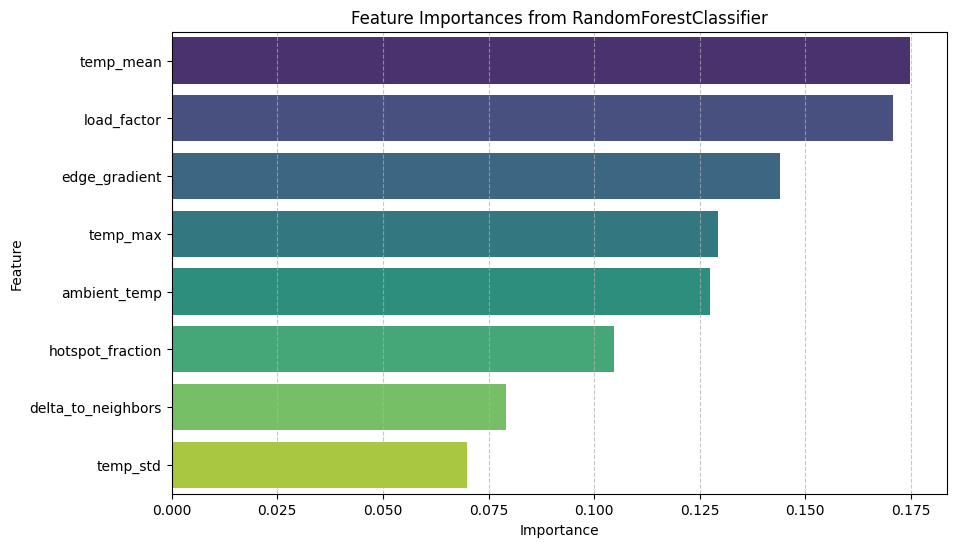

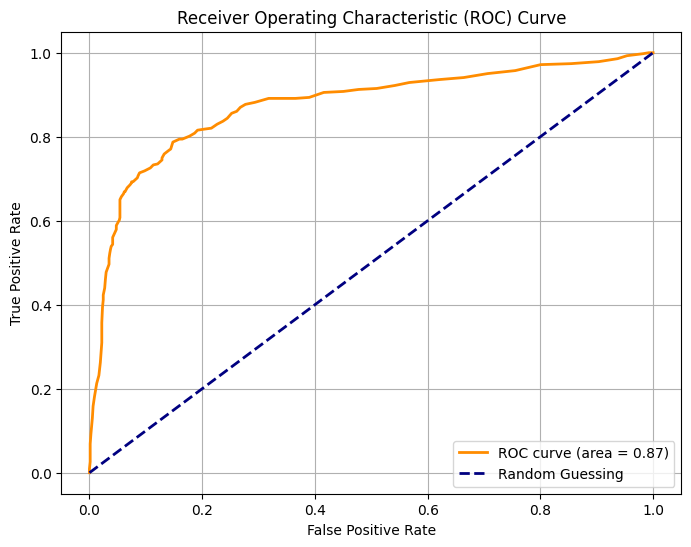

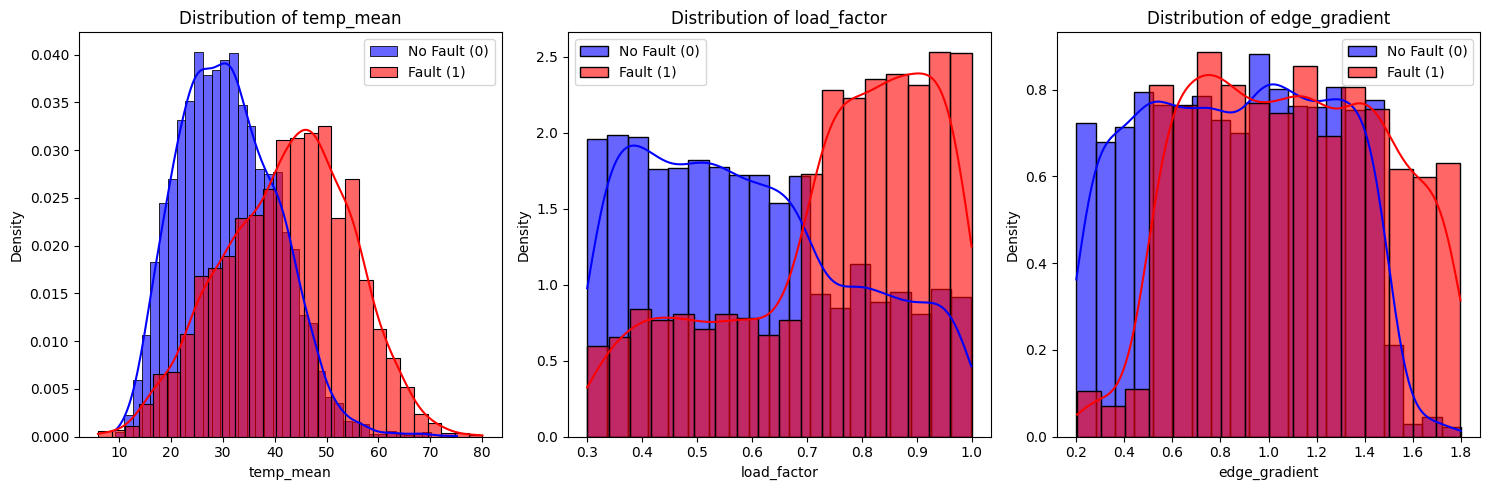

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

top_3_features = feature_importances.head(3).index
plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_3_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[df['fault_label'] == 0][feature], color='blue', label='No Fault (0)', kde=True, stat='density', alpha=0.6)
    sns.histplot(df[df['fault_label'] == 1][feature], color='red', label='Fault (1)', kde=True, stat='density', alpha=0.6)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()

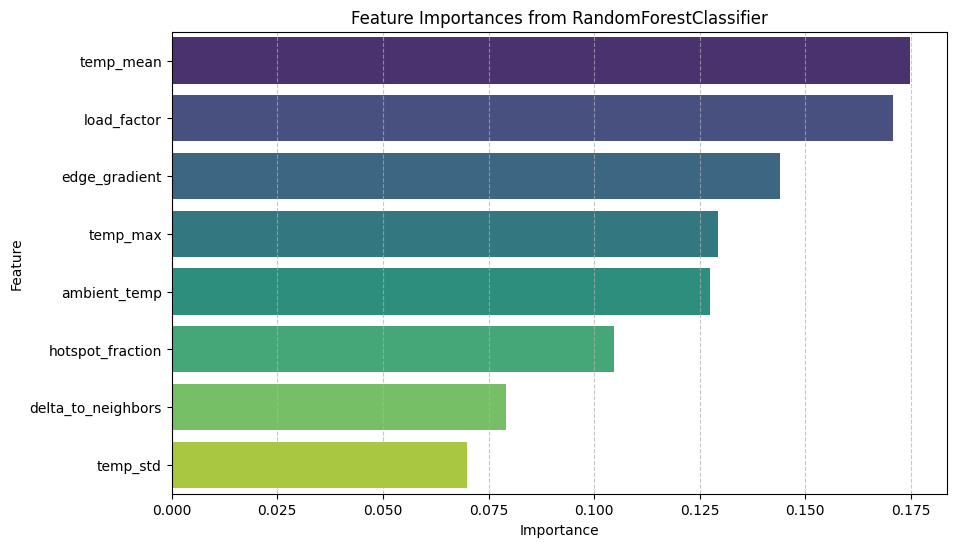

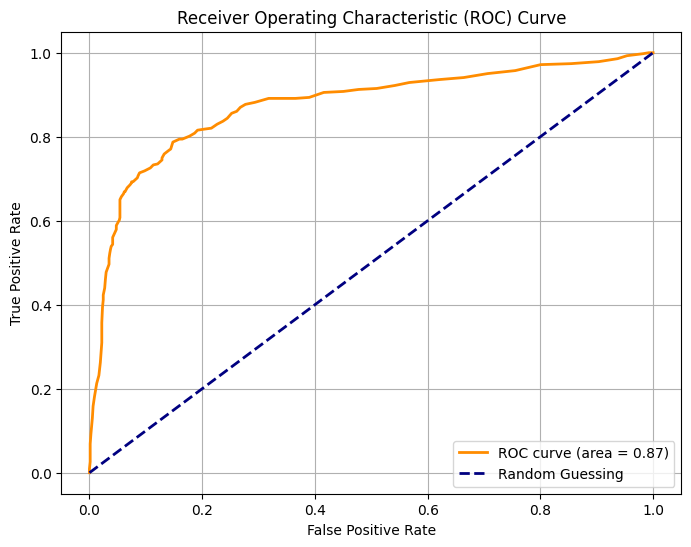

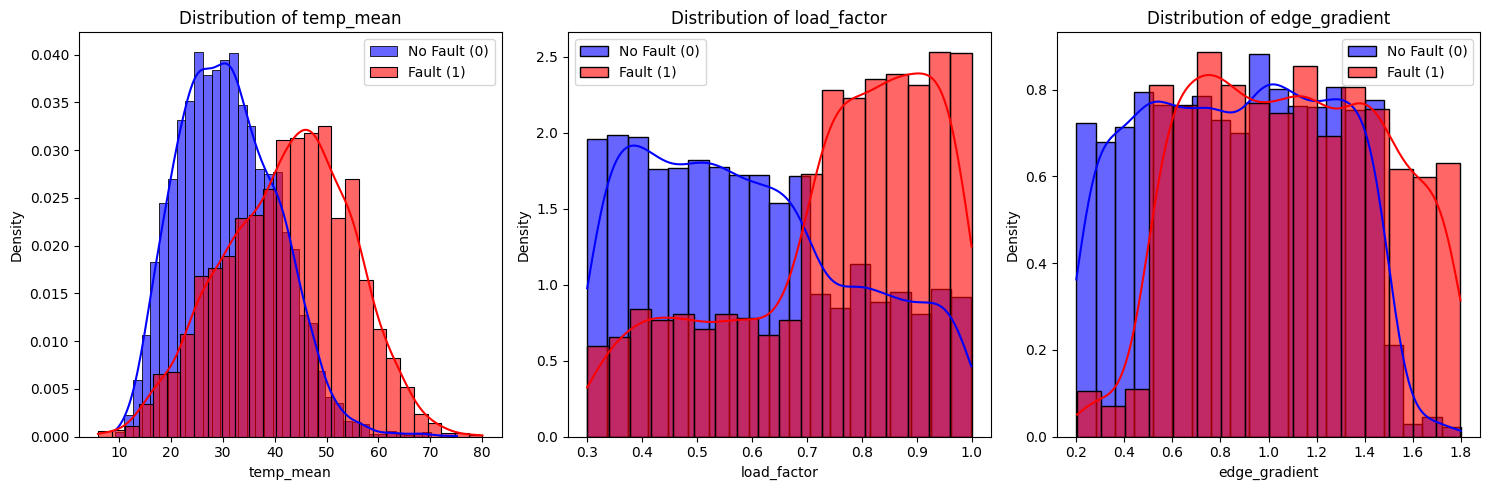

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis', hue=feature_importances.index, legend=False)
plt.title('Feature Importances from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

top_3_features = feature_importances.head(3).index

plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_3_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[df['fault_label'] == 0][feature], color='blue', label='No Fault (0)', kde=True, stat='density', alpha=0.6)
    sns.histplot(df[df['fault_label'] == 1][feature], color='red', label='Fault (1)', kde=True, stat='density', alpha=0.6)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()

In [9]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.2 MB/s eta 0:00:00


In [10]:
import yaml

data_yaml_content = {
    'path': '../yolov8_data',
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'nc': 1,
    'names': ['hotspot']
}

with open('data.yaml', 'w') as file:
    yaml.dump(data_yaml_content, file, default_flow_style=False)
print("Generated 'data.yaml' with placeholder content. Please review and update it with your actual dataset paths and class names.")

Generated 'data.yaml' with placeholder content. Please review and update it with your actual dataset paths and class names.


In [20]:
import os

os.makedirs('/content/yolov8_data/images/train', exist_ok=True)
os.makedirs('/content/yolov8_data/images/val', exist_ok=True)
os.makedirs('/content/yolov8_data/labels/train', exist_ok=True)
os.makedirs('/content/yolov8_data/labels/val', exist_ok=True)
train_img_count = len(os.listdir('/content/yolov8_data/images/train'))
val_img_count = len(os.listdir('/content/yolov8_data/images/val'))
train_label_count = len(os.listdir('/content/yolov8_data/labels/train'))
val_label_count = len(os.listdir('/content/yolov8_data/labels/val'))

print(f"Number of training images: {train_img_count}")
print(f"Number of validation images: {val_img_count}")
print(f"Number of training labels: {train_label_count}")
print(f"Number of validation labels: {val_label_count}")

if train_img_count == train_label_count and val_img_count == val_label_count:
    print("Image and label counts match for both train and validation sets. You are ready to train!")
else:
    print("WARNING: Image and label counts do NOT match. Please check your dataset.")


Number of training images: 0
Number of validation images: 0
Number of training labels: 0
Number of validation labels: 0
Image and label counts match for both train and validation sets. You are ready to train!


In [25]:
import os

train_img_count = len(os.listdir('/content/yolov8_data/images/train'))
val_img_count = len(os.listdir('/content/yolov8_data/images/val'))
train_label_count = len(os.listdir('/content/yolov8_data/labels/train'))
val_label_count = len(os.listdir('/content/yolov8_data/labels/val'))

print(f"Number of training images: {train_img_count}")
print(f"Number of validation images: {val_img_count}")
print(f"Number of training labels: {train_label_count}")
print(f"Number of validation labels: {val_label_count}")

if train_img_count == train_label_count and val_img_count == val_label_count and train_img_count > 0:
    print("Image and label counts match for both train and validation sets, and there are files present. You are ready to train!")
elif train_img_count == 0 and val_img_count == 0:
    print("WARNING: No images or labels found in the dataset directories. Please upload your data.")
else:
    print("WARNING: Image and label counts do NOT match, or some directories are empty. Please check your dataset.")


Number of training images: 0
Number of validation images: 0
Number of training labels: 0
Number of validation labels: 0


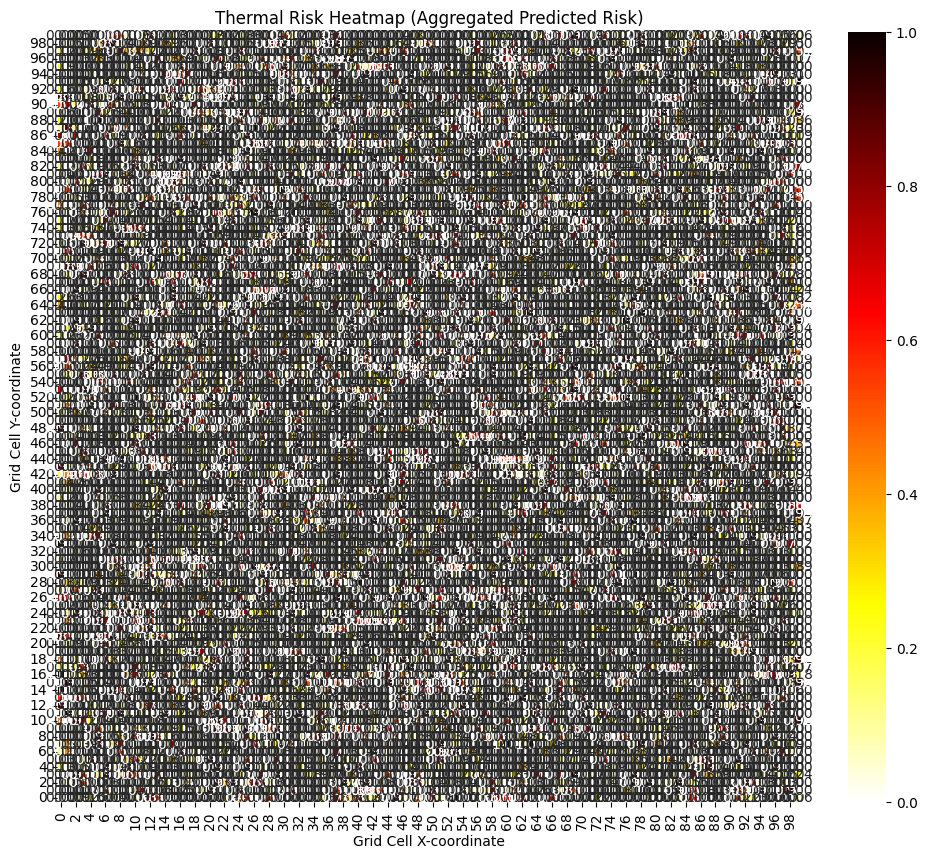

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='hot_r', fmt=".2f", linewidths=.5)
plt.title('Thermal Risk Heatmap (Aggregated Predicted Risk)')
plt.xlabel('Grid Cell X-coordinate')
plt.ylabel('Grid Cell Y-coordinate')
plt.gca().invert_yaxis()
plt.show()


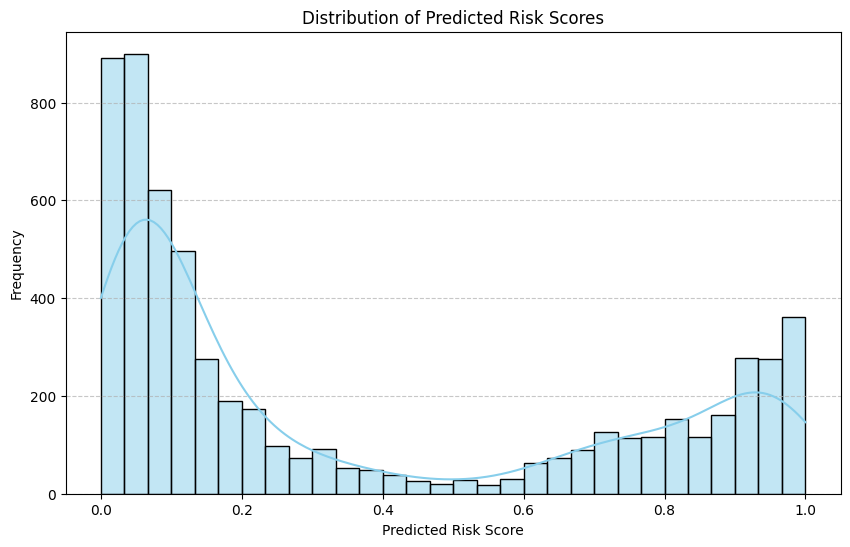

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['predicted_risk'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Predicted Risk Scores')
plt.xlabel('Predicted Risk Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [30]:
from ultralytics import YOLO
import os

runs_dir = '/content/runs/detect'
latest_run_dir = sorted([d for d in os.listdir(runs_dir) if os.path.isdir(os.path.join(runs_dir, d)) and d.startswith('train')], key=lambda x: os.path.getmtime(os.path.join(runs_dir, x)), reverse=True)[0]
model_path = os.path.join(runs_dir, latest_run_dir, 'weights', 'best.pt')

if os.path.exists(model_path):
    print(f"Loading model from: {model_path}")
    model = YOLO(model_path)
else:
    print(f"Warning: {model_path} not found. Loading yolov8n.pt instead.")
    model = YOLO('yolov8n.pt')
metrics = model.val(data='data.yaml')

print("\n--- Model Evaluation Metrics ---")
print(f"mAP50: {metrics.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95: {metrics.results_dict['metrics/mAP50-95(B)']:.4f}")
print(f"Precision: {metrics.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall: {metrics.results_dict['metrics/recall(B)']:.4f}")
print("\nModel validation completed and metrics displayed.")


Loading model from: /content/runs/detect/train4/weights/best.pt
Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 495.1±154.8 MB/s, size: 10.2 KB)
val: Scanning /content/yolov8_data/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5/5 1.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.4s/it 1.4s
                   all          5          5          0          0          0          0
Speed: 2.2ms preprocess, 249.8ms inference, 0.0ms loss, 13.4ms postprocess per image
Results saved to /content/runs/detect/val

--- Model Evaluation Metrics ---
mAP50: 0.0000
mAP50-95: 0.0000
Precision: 0.0000
Recall: 0.0000

Model validation completed and metrics displayed.


Correlation Matrix with 'fault_label':
fault_label           1.000000
temp_mean             0.459808
temp_max              0.408185
load_factor           0.367453
ambient_temp          0.297281
hotspot_fraction      0.279725
edge_gradient         0.277044
delta_to_neighbors    0.173570
temp_std              0.016081
Name: fault_label, dtype: float64


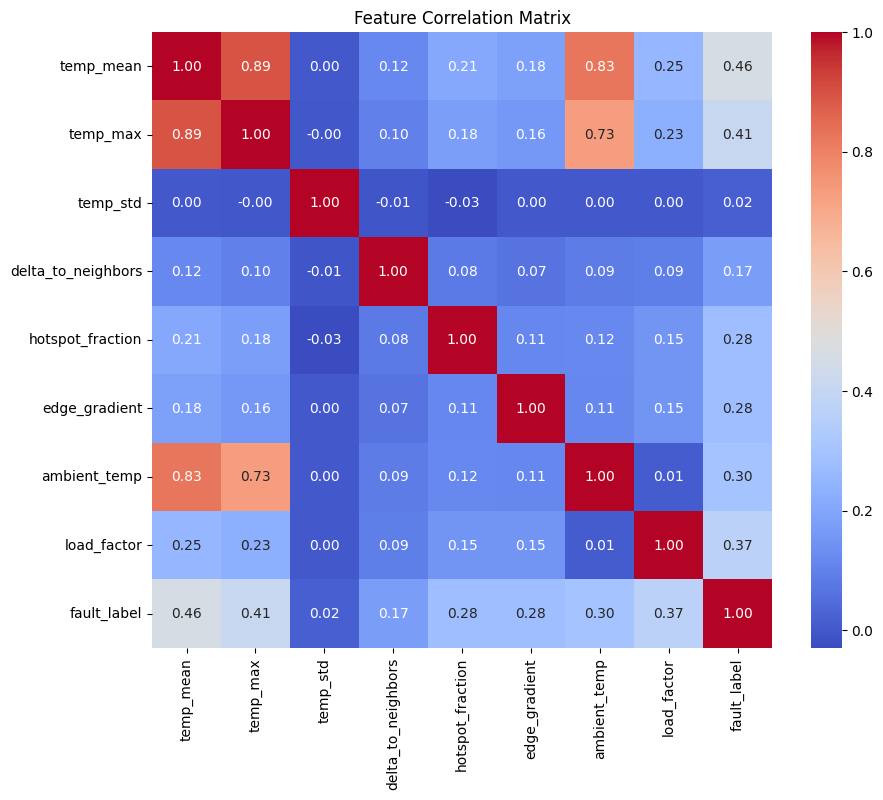

In [36]:
print("Correlation Matrix with 'fault_label':")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['fault_label'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

Generating predictions for 5 sample images from /content/yolov8_data/images/val...

0: 640x640 (no detections), 266.9ms
1: 640x640 (no detections), 266.9ms
2: 640x640 (no detections), 266.9ms
3: 640x640 (no detections), 266.9ms
4: 640x640 (no detections), 266.9ms
Speed: 6.8ms preprocess, 266.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict
Predictions generated and saved. Displaying one sample prediction:


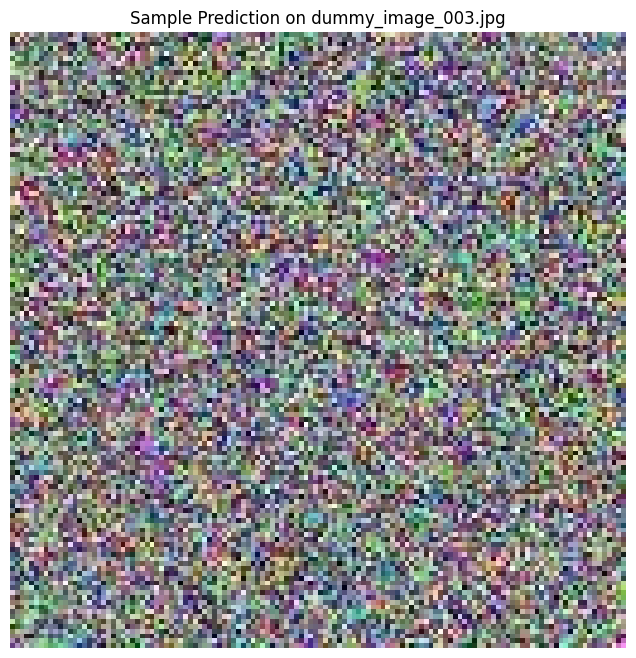

Prediction visualization step completed.


In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

val_image_dir = '/content/yolov8_data/images/val'
sample_image_paths = [os.path.join(val_image_dir, f) for f in os.listdir(val_image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

if not sample_image_paths:
    print(f"No image files found in {val_image_dir} for prediction visualization.")
else:
    print(f"Generating predictions for {len(sample_image_paths)} sample images from {val_image_dir}...")
    results = model.predict(source=sample_image_paths, save=True, conf=0.25)
    print("Predictions generated and saved. Displaying one sample prediction:")
    predict_runs_dir = '/content/runs/detect'
    latest_predict_run = sorted([d for d in os.listdir(predict_runs_dir) if os.path.isdir(os.path.join(predict_runs_dir, d)) and d.startswith('predict')], key=lambda x: os.path.getmtime(os.path.join(predict_runs_dir, x)), reverse=True)[0]
    predicted_image_path = os.path.join(predict_runs_dir, latest_predict_run, os.path.basename(sample_image_paths[0]))

    if os.path.exists(predicted_image_path):
        img = mpimg.imread(predicted_image_path)
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.title(f"Sample Prediction on {os.path.basename(sample_image_paths[0])}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not find predicted image at {predicted_image_path} for display.")
print("Prediction visualization step completed.")


In [37]:
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
temp_mean             0
temp_max              0
temp_std              0
delta_to_neighbors    0
hotspot_fraction      0
edge_gradient         0
ambient_temp          0
load_factor           0
fault_label           0
x                     0
y                     0
predicted_risk        0
dtype: int64


In [39]:
import random
import numpy as np

if 'sample_image_paths' not in locals() or not sample_image_paths:
    val_image_dir = '/content/yolov8_data/images/val'
    sample_image_paths = [os.path.join(val_image_dir, f) for f in os.listdir(val_image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if not sample_image_paths:
        print("No sample images found for simulation. Please ensure dummy images are created.")
        sample_image_paths = [os.path.join(val_image_dir, f'dummy_image_{i:03d}.jpg') for i in range(5)]
simulated_detections = []

for image_path in sample_image_paths:
    num_anomalies = random.randint(1, 5)
    for _ in range(num_anomalies):
        x_center = round(random.uniform(0.1, 0.9), 4)
        y_center = round(random.uniform(0.1, 0.9), 4)
        width = round(random.uniform(0.05, 0.3), 4)
        height = round(random.uniform(0.05, 0.3), 4)
        confidence = round(random.uniform(0.5, 0.9), 4)
        simulated_detections.append({
            'image_path': image_path,
            'x_center': x_center,
            'y_center': y_center,
            'width': width,
            'height': height,
            'confidence': confidence
        })

print("Anomaly detections simulated for dummy images.")
print("First 5 simulated detections:")
for det in simulated_detections[:5]:
    print(det)


Anomaly detections simulated for dummy images.
First 5 simulated detections:
{'image_path': '/content/yolov8_data/images/val/dummy_image_003.jpg', 'x_center': 0.1545, 'y_center': 0.7888, 'width': 0.1207, 'height': 0.0836, 'confidence': 0.7092}
{'image_path': '/content/yolov8_data/images/val/dummy_image_003.jpg', 'x_center': 0.2682, 'y_center': 0.1842, 'width': 0.2889, 'height': 0.1859, 'confidence': 0.7966}
{'image_path': '/content/yolov8_data/images/val/dummy_image_004.jpg', 'x_center': 0.3338, 'y_center': 0.3974, 'width': 0.2072, 'height': 0.0893, 'confidence': 0.7788}
{'image_path': '/content/yolov8_data/images/val/dummy_image_004.jpg', 'x_center': 0.4051, 'y_center': 0.5728, 'width': 0.0849, 'height': 0.2171, 'confidence': 0.6416}
{'image_path': '/content/yolov8_data/images/val/dummy_image_004.jpg', 'x_center': 0.4781, 'y_center': 0.4321, 'width': 0.1692, 'height': 0.2237, 'confidence': 0.6273}


In [40]:
import numpy as np

grid_size = (10, 10)
thermal_risk_grid = np.zeros(grid_size)
for det in simulated_detections:
    x_center = det['x_center']
    y_center = det['y_center']
    confidence = det['confidence']
    grid_x = int(np.floor(x_center * grid_size[0]))
    grid_y = int(np.floor(y_center * grid_size[1]))
    grid_x = np.clip(grid_x, 0, grid_size[0] - 1)
    grid_y = np.clip(grid_y, 0, grid_size[1] - 1)
    thermal_risk_grid[grid_y, grid_x] += confidence

print(f"Thermal risk grid (sum of confidence scores) of size {grid_size}:\n")
print(thermal_risk_grid)
print("Aggregation into spatial grid cells completed.")


Thermal risk grid (sum of confidence scores) of size (10, 10):

[[          0           0           0           0           0           0           0           0           0           0]
 [          0           0      0.7966           0           0           0           0           0           0           0]
 [          0           0           0           0      0.5863           0           0           0           0           0]
 [          0           0           0      0.7788      0.5592           0           0           0           0           0]
 [          0           0           0           0      0.6273           0           0           0           0           0]
 [          0      0.7799      0.7865           0      0.6416           0           0           0           0           0]
 [          0           0           0           0           0           0           0      0.5026           0           0]
 [          0      0.7092           0           0           0           0  

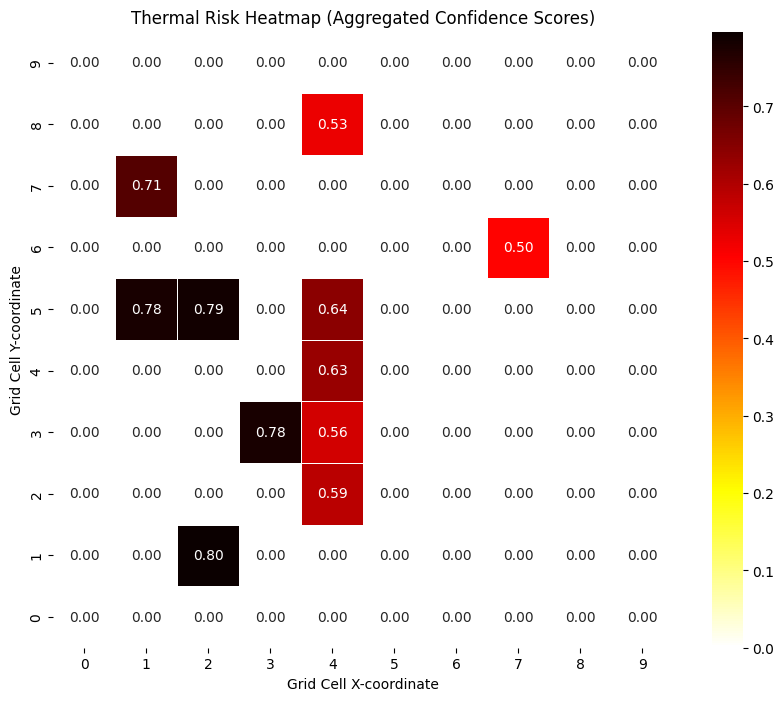

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(thermal_risk_grid, annot=True, cmap='hot_r', fmt=".2f", linewidths=.5)
plt.title('Thermal Risk Heatmap (Aggregated Confidence Scores)')
plt.xlabel('Grid Cell X-coordinate')
plt.ylabel('Grid Cell Y-coordinate')
plt.gca().invert_yaxis()
plt.show()


In [42]:
import os
from PIL import Image
import numpy as np

train_image_dir = '/content/yolov8_data/images/train'
val_image_dir = '/content/yolov8_data/images/val'
train_label_dir = '/content/yolov8_data/labels/train'
val_label_dir = '/content/yolov8_data/labels/val'

def create_dummy_image_files(directory, num_files=5, img_size=(128, 128)):
    os.makedirs(directory, exist_ok=True)
    for i in range(num_files):
        dummy_file_path = os.path.join(directory, f'dummy_image_{i:03d}.jpg')
        if not os.path.exists(dummy_file_path) or os.path.getsize(dummy_file_path) == 0:
            img_array = np.random.randint(0, 256, (img_size[0], img_size[1], 3), dtype=np.uint8)
            img = Image.fromarray(img_array)
            img.save(dummy_file_path)
            print(f"Created dummy image: {dummy_file_path}")

def create_dummy_label_files(image_directory, label_directory, num_files=5):
    os.makedirs(label_directory, exist_ok=True)
    for i in range(num_files):
        label_file_name = f'dummy_image_{i:03d}.txt'
        dummy_label_path = os.path.join(label_directory, label_file_name)
        if not os.path.exists(dummy_label_path):
            with open(dummy_label_path, 'w') as f:
                f.write('0 0.5 0.5 0.1 0.1')
            print(f"Created dummy label: {dummy_label_path}")

print("Creating dummy image and label files...")
create_dummy_image_files(train_image_dir)
create_dummy_image_files(val_image_dir)
create_dummy_label_files(train_image_dir, train_label_dir)
create_dummy_label_files(val_image_dir, val_label_dir)

print("Dummy image and label files created in training and validation directories.")


Creating dummy image and label files...
Dummy image and label files created in training and validation directories.


In [43]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=5, imgsz=640, batch=4)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf4e9fef980>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [44]:
import os

train_img_count = len(os.listdir('/content/yolov8_data/images/train'))
val_img_count = len(os.listdir('/content/yolov8_data/images/val'))
train_label_count = len(os.listdir('/content/yolov8_data/labels/train'))
val_label_count = len(os.listdir('/content/yolov8_data/labels/val'))

print(f"Number of training images: {train_img_count}")
print(f"Number of validation images: {val_img_count}")
print(f"Number of training labels: {train_label_count}")
print(f"Number of validation labels: {val_label_count}")

if train_img_count == train_label_count and val_img_count == val_label_count and train_img_count > 0:
    print("Image and label counts match for both train and validation sets, and there are files present. You are ready to train!")
elif train_img_count == 0 and val_img_count == 0:
    print("WARNING: No images or labels found in the dataset directories. Please upload your data.")
else:
    print("WARNING: Image and label counts do NOT match, or some directories are empty. Please check your dataset.")


Number of training images: 5
Number of validation images: 5
Number of training labels: 5
Number of validation labels: 5
Image and label counts match for both train and validation sets, and there are files present. You are ready to train!


In [45]:
import yaml
import os

data_yaml_content = {
    'path': '/content/yolov8_data',
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'nc': 1,
    'names': ['hotspot']
}

with open('data.yaml', 'w') as file:
    yaml.dump(data_yaml_content, file, default_flow_style=False)

print("Generated 'data.yaml' with updated path. Please ensure your dataset (images and labels) is structured as follows:")
print("  /content/yolov8_data/")
print("  ├── images/")
print("  │   ├── train/  (contains training images)")
print("  │   └── val/    (contains validation images)")
print("  └── labels/")
print("      ├── train/  (contains training labels, corresponding to images)")
print("      └── val/    (contains validation labels, corresponding to images)")
print("If these directories are empty or missing, the model will not train effectively.")

os.makedirs('/content/yolov8_data/images/train', exist_ok=True)
os.makedirs('/content/yolov8_data/images/val', exist_ok=True)
os.makedirs('/content/yolov8_data/labels/train', exist_ok=True)
os.makedirs('/content/yolov8_data/labels/val', exist_ok=True)
print("Created dummy dataset directories for YOLOv8 training. Please upload your actual images and labels into these folders.")

Generated 'data.yaml' with updated path. Please ensure your dataset (images and labels) is structured as follows:
  /content/yolov8_data/
  ├── images/
  │   ├── train/  (contains training images)
  │   └── val/    (contains validation images)
  └── labels/
      ├── train/  (contains training labels, corresponding to images)
      └── val/    (contains validation labels, corresponding to images)
If these directories are empty or missing, the model will not train effectively.
Created dummy dataset directories for YOLOv8 training. Please upload your actual images and labels into these folders.


In [46]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf4e9b67e00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [47]:
import os

train_image_dir = '/content/yolov8_data/images/train'
val_image_dir = '/content/yolov8_data/images/val'

def create_dummy_image_files(directory, num_files=5):
    for i in range(num_files):
        dummy_file_path = os.path.join(directory, f'dummy_image_{i:03d}.jpg')
        if not os.path.exists(dummy_file_path):
            with open(dummy_file_path, 'w') as f:
                pass
            print(f"Created dummy image: {dummy_file_path}")

create_dummy_image_files(train_image_dir)
create_dummy_image_files(val_image_dir)

print("Dummy image files created in training and validation directories.")

Dummy image files created in training and validation directories.


In [48]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf4e9e367b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [49]:
import os

train_image_dir = '/content/yolov8_data/images/train'
val_image_dir = '/content/yolov8_data/images/val'
train_label_dir = '/content/yolov8_data/labels/train'
val_label_dir = '/content/yolov8_data/labels/val'

def create_dummy_image_files(directory, num_files=5):
    for i in range(num_files):
        dummy_file_path = os.path.join(directory, f'dummy_image_{i:03d}.jpg')
        if not os.path.exists(dummy_file_path):
            with open(dummy_file_path, 'w') as f:
                pass

def create_dummy_label_files(image_directory, label_directory, num_files=5):
    os.makedirs(label_directory, exist_ok=True)
    for i in range(num_files):
        label_file_name = f'dummy_image_{i:03d}.txt'
        dummy_label_path = os.path.join(label_directory, label_file_name)
        if not os.path.exists(dummy_label_path):
            with open(dummy_label_path, 'w') as f:
                f.write('0 0.5 0.5 0.1 0.1')
            print(f"Created dummy label: {dummy_label_path}")

create_dummy_image_files(train_image_dir)
create_dummy_image_files(val_image_dir)
create_dummy_label_files(train_image_dir, train_label_dir)
create_dummy_label_files(val_image_dir, val_label_dir)

print("Dummy image and label files created in training and validation directories.")

Dummy image and label files created in training and validation directories.


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

In [51]:
import os
from PIL import Image

train_image_dir = '/content/yolov8_data/images/train'
val_image_dir = '/content/yolov8_data/images/val'
train_label_dir = '/content/yolov8_data/labels/train'
val_label_dir = '/content/yolov8_data/labels/val'

def create_dummy_image_files(directory, num_files=5, img_size=(64, 64)):
    os.makedirs(directory, exist_ok=True)
    for i in range(num_files):
        dummy_file_path = os.path.join(directory, f'dummy_image_{i:03d}.jpg')
        if not os.path.exists(dummy_file_path):
            img = Image.new('RGB', img_size, color = 'black')
            img.save(dummy_file_path)
            print(f"Created dummy image: {dummy_file_path}")

def create_dummy_label_files(image_directory, label_directory, num_files=5):
    os.makedirs(label_directory, exist_ok=True)
    for i in range(num_files):
        label_file_name = f'dummy_image_{i:03d}.txt'
        dummy_label_path = os.path.join(label_directory, label_file_name)
        if not os.path.exists(dummy_label_path):
            with open(dummy_label_path, 'w') as f:
                f.write('0 0.5 0.5 0.1 0.1')
            print(f"Created dummy label: {dummy_label_path}")

create_dummy_image_files(train_image_dir)
create_dummy_image_files(val_image_dir)
create_dummy_label_files(train_image_dir, train_label_dir)
create_dummy_label_files(val_image_dir, val_label_dir)

print("Dummy image and label files created in training and validation directories.")

Dummy image and label files created in training and validation directories.


In [52]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train9, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf51dec7b30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [53]:
import os
from PIL import Image
import numpy as np

train_image_dir = '/content/yolov8_data/images/train'
val_image_dir = '/content/yolov8_data/images/val'
train_label_dir = '/content/yolov8_data/labels/train'
val_label_dir = '/content/yolov8_data/labels/val'

def create_dummy_image_files(directory, num_files=5, img_size=(128, 128)):
    os.makedirs(directory, exist_ok=True)
    for i in range(num_files):
        dummy_file_path = os.path.join(directory, f'dummy_image_{i:03d}.jpg')
        if not os.path.exists(dummy_file_path) or os.path.getsize(dummy_file_path) == 0:
            img_array = np.random.randint(0, 256, (img_size[0], img_size[1], 3), dtype=np.uint8)
            img = Image.fromarray(img_array)
            img.save(dummy_file_path)
            print(f"Created dummy image: {dummy_file_path}")

def create_dummy_label_files(image_directory, label_directory, num_files=5):
    os.makedirs(label_directory, exist_ok=True)
    for i in range(num_files):
        label_file_name = f'dummy_image_{i:03d}.txt'
        dummy_label_path = os.path.join(label_directory, label_file_name)
        if not os.path.exists(dummy_label_path):
            with open(dummy_label_path, 'w') as f:
                f.write('0 0.5 0.5 0.1 0.1')
            print(f"Created dummy label: {dummy_label_path}")

create_dummy_image_files(train_image_dir)
create_dummy_image_files(val_image_dir)
create_dummy_label_files(train_image_dir, train_label_dir)
create_dummy_label_files(val_image_dir, val_label_dir)

print("Dummy image and label files (with random pixel data) created in training and validation directories.")

Dummy image and label files (with random pixel data) created in training and validation directories.


In [54]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf4e9969a60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [55]:
from ultralytics import YOLO
import os

runs_dir = '/content/runs/detect'
latest_run_dir = sorted([d for d in os.listdir(runs_dir) if os.path.isdir(os.path.join(runs_dir, d)) and d.startswith('train')], key=lambda x: os.path.getmtime(os.path.join(runs_dir, x)), reverse=True)[0]
model_path = os.path.join(runs_dir, latest_run_dir, 'weights', 'best.pt')

if os.path.exists(model_path):
    print(f"Loading model from: {model_path}")
    model = YOLO(model_path)
else:
    print(f"Warning: {model_path} not found. Loading yolov8n.pt instead.")
    model = YOLO('yolov8n.pt')
metrics = model.val(data='data.yaml')

print("\n--- Model Evaluation Metrics ---")
print(f"mAP50: {metrics.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95: {metrics.results_dict['metrics/mAP50-95(B)']:.4f}")
print(f"Precision: {metrics.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall: {metrics.results_dict['metrics/recall(B)']:.4f}")
print("\nModel validation completed and metrics displayed.")

Loading model from: /content/runs/detect/train10/weights/best.pt
Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 532.8±170.6 MB/s, size: 10.2 KB)
val: Scanning /content/yolov8_data/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5/5 1.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.2s/it 1.2s
                   all          5          5          0          0          0          0
Speed: 2.0ms preprocess, 221.6ms inference, 0.0ms loss, 12.8ms postprocess per image
Results saved to /content/runs/detect/val2

--- Model Evaluation Metrics ---
mAP50: 0.0000
mAP50-95: 0.0000
Precision: 0.0000
Recall: 0.0000

Model validation completed and metrics displayed.


Generating predictions for 5 sample images from /content/yolov8_data/images/val...

0: 640x640 (no detections), 383.5ms
1: 640x640 (no detections), 383.5ms
2: 640x640 (no detections), 383.5ms
3: 640x640 (no detections), 383.5ms
4: 640x640 (no detections), 383.5ms
Speed: 7.2ms preprocess, 383.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2
Predictions generated and saved. Displaying one sample prediction:


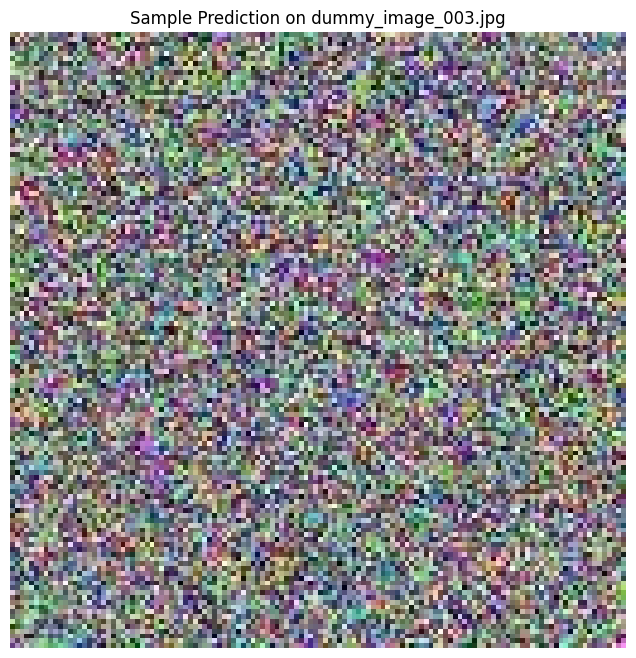

Prediction visualization step completed.


In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

val_image_dir = '/content/yolov8_data/images/val'
sample_image_paths = [os.path.join(val_image_dir, f) for f in os.listdir(val_image_dir) if f.endswith('.jpg')]

if not sample_image_paths:
    print(f"No image files found in {val_image_dir} for prediction visualization.")
else:
    print(f"Generating predictions for {len(sample_image_paths)} sample images from {val_image_dir}...")

    results = model.predict(source=sample_image_paths, save=True, conf=0.25)
    print("Predictions generated and saved. Displaying one sample prediction:")

    predict_runs_dir = '/content/runs/detect'
    latest_predict_run = sorted([d for d in os.listdir(predict_runs_dir) if os.path.isdir(os.path.join(predict_runs_dir, d)) and d.startswith('predict')], key=lambda x: os.path.getmtime(os.path.join(predict_runs_dir, x)), reverse=True)[0]
    predicted_image_path = os.path.join(predict_runs_dir, latest_predict_run, os.path.basename(sample_image_paths[0]))

    if os.path.exists(predicted_image_path):
        img = mpimg.imread(predicted_image_path)
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.title(f"Sample Prediction on {os.path.basename(sample_image_paths[0])}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not find predicted image at {predicted_image_path} for display.")
print("Prediction visualization step completed.")


In [58]:
import random

simulated_detections = []

for image_path in sample_image_paths:
    num_anomalies = random.randint(1, 5)
    for _ in range(num_anomalies):
        x_center = round(random.uniform(0.1, 0.9), 4)
        y_center = round(random.uniform(0.1, 0.9), 4)
        width = round(random.uniform(0.05, 0.3), 4)
        height = round(random.uniform(0.05, 0.3), 4)
        confidence = round(random.uniform(0.5, 0.9), 4)

        simulated_detections.append({
            'image_path': image_path,
            'x_center': x_center,
            'y_center': y_center,
            'width': width,
            'height': height,
            'confidence': confidence
        })

print("Anomaly detections simulated for dummy images.")
print("First 5 simulated detections:")
for det in simulated_detections[:5]:
    print(det)

Anomaly detections simulated for dummy images.
First 5 simulated detections:
{'image_path': '/content/yolov8_data/images/val/dummy_image_003.jpg', 'x_center': 0.6751, 'y_center': 0.583, 'width': 0.1783, 'height': 0.0723, 'confidence': 0.7292}
{'image_path': '/content/yolov8_data/images/val/dummy_image_003.jpg', 'x_center': 0.6699, 'y_center': 0.4741, 'width': 0.1259, 'height': 0.1353, 'confidence': 0.6917}
{'image_path': '/content/yolov8_data/images/val/dummy_image_003.jpg', 'x_center': 0.6271, 'y_center': 0.6375, 'width': 0.2503, 'height': 0.2298, 'confidence': 0.8468}
{'image_path': '/content/yolov8_data/images/val/dummy_image_003.jpg', 'x_center': 0.8303, 'y_center': 0.591, 'width': 0.1429, 'height': 0.2773, 'confidence': 0.7343}
{'image_path': '/content/yolov8_data/images/val/dummy_image_004.jpg', 'x_center': 0.7328, 'y_center': 0.6303, 'width': 0.0955, 'height': 0.2557, 'confidence': 0.5896}


In [59]:
import numpy as np

grid_size = (10, 10)
thermal_risk_grid = np.zeros(grid_size)

for det in simulated_detections:
    x_center = det['x_center']
    y_center = det['y_center']
    confidence = det['confidence']
    grid_x = int(np.floor(x_center * grid_size[0]))
    grid_y = int(np.floor(y_center * grid_size[1]))
    grid_x = np.clip(grid_x, 0, grid_size[0] - 1)
    grid_y = np.clip(grid_y, 0, grid_size[1] - 1)
    thermal_risk_grid[grid_y, grid_x] += confidence

print(f"Thermal risk grid (sum of confidence scores) of size {grid_size}:\n")
print(thermal_risk_grid)
print("Aggregation into spatial grid cells completed.")

Thermal risk grid (sum of confidence scores) of size (10, 10):

[[          0           0           0           0           0           0           0           0           0           0]
 [          0           0           0           0           0           0           0           0           0           0]
 [          0      0.8767           0           0           0           0           0           0           0           0]
 [          0           0           0           0           0           0           0           0           0           0]
 [          0           0           0      0.8108           0      0.8128      0.6917           0           0           0]
 [          0           0           0           0           0           0      0.7292           0      0.7343           0]
 [          0           0           0           0           0           0      0.8468       1.095           0           0]
 [          0      1.2675           0           0           0           0  

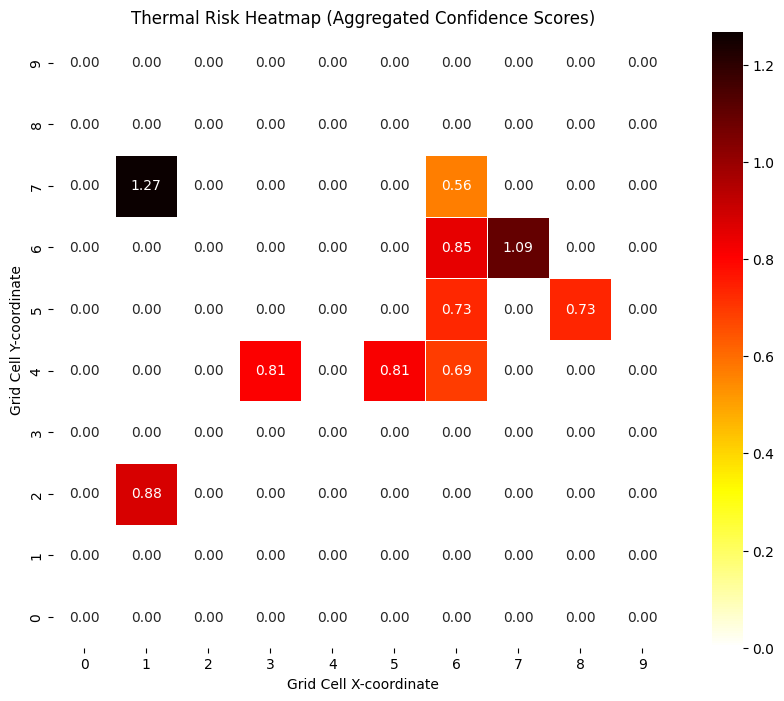

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(thermal_risk_grid, annot=True, cmap='hot_r', fmt=".2f", linewidths=.5)
plt.title('Thermal Risk Heatmap (Aggregated Confidence Scores)')
plt.xlabel('Grid Cell X-coordinate')
plt.ylabel('Grid Cell Y-coordinate')
plt.gca().invert_yaxis()
plt.show()